<a href="https://colab.research.google.com/github/ttrevorreese/finalyearproject/blob/main/Algorithm_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algorithm Tests**

---

This Colab notebook is for initial testing of different algorithms to evaluate efficiency and accuracy. This will aid in determining the final algorithm(s) used in the final product. Sources will be given where the codes are referenced from.

**Note: These tests will be conducted with the bare bones 'BusStops_v1' dataset.**

## Import Libraries

In [30]:
from array import array
import pandas as pd
import time
import math

## Loading Dataset

---

Loading the BusStops_v1 dataset:

In [29]:
data = pd.read_csv('BusStops_v1.xlsx', sep='\t', engine='python')

data.head(10)

UnicodeDecodeError: ignored

## References

---

- Searching Algorithms in Python
  - https://stackabuse.com/search-algorithms-in-python/

## Linear Search Algorithm

---

Linear search is one of the simplest searching algorithms, and the easiest to understand. We can think of it as a ramped-up version of our own implementation of Python's `in` operator.

The algorithm consists of iterating over an array and returning the index of the first occurrence of an item once it is found:

In [1]:
def LinearSearch(lys, element):
    for i in range (len(lys)):
        if lys[i] == element:
            return i
    return -1

In [2]:
print(LinearSearch([1,2,3,4,5,2,1], 2))

1


This is the index of the first occurrence of the item we are searching for - keeping in mind that Python indexes are 0-based.

The time complexity of linear search is O(n), meaning that the time taken to execute increases with the number of items in our input list `lys`.

Linear search is not often used in practice, because the same efficiency can be achieved by using inbuilt methods or existing operators, and it is not as fast or efficient as other search algorithms.

Linear search is a good fit for when we need to find the first occurrence of an item in an unsorted collection because unlike most other search algorithms, it does not require that a collection be sorted before searching begins.

## Binary Search Algorithm

---

Binary search follows a divide and conquer methodology. It is faster than linear search but requires that the array be sorted before the algorithm is executed.

Assuming that we're searching for a value `val` in a sorted array, the algorithm compares `val` to the value of the middle element of the array, which we'll call `mid`.

- If `mid` is the element we are looking for (best case), we return its index.
- If not, we identify which side of `mid` `val` is more likely to be on based on whether `val` is smaller or greater than `mid`, and discard the other side of the array.
- We then recursively or iteratively follow the same steps, choosing a new value for `mid`, comparing it with `val` and discarding half of the possible matches in each iteration of the algorithm.
The binary search algorithm can be written either recursively or iteratively. Recursion is generally slower in Python because it requires the allocation of new stack frames.

Since a good search algorithm should be as fast and accurate as possible, let's consider the iterative implementation of binary search:

In [3]:
def BinarySearch(lys, val):
    first = 0
    last = len(lys)-1
    index = -1
    while (first <= last) and (index == -1):
        mid = (first+last)//2
        if lys[mid] == val:
            index = mid
        else:
            if val<lys[mid]:
                last = mid -1
            else:
                first = mid +1
    return index

In [4]:
BinarySearch([10,20,30,40,50], 20)

1

The action that the algorithm performs next in each iteration is one of several possibilities:

- Returning the index of the current element
- Searching through the left half of the array
- Searching through the right half of the array

We can only pick one possibility per iteration, and our pool of possible matches gets divided by two in each iteration. This makes the time complexity of binary search O(log n).

One drawback of binary search is that if there are multiple occurrences of an element in the array, it does not return the index of the first element, but rather the index of the element closest to the middle:

In [12]:
print(BinarySearch([4,4,4,4,4], 4))

2


For comparison performing a linear search on the same array would return: `0`

Which is the index of the first element. However, we cannot categorically say that binary search does not work if an array contains the same element twice - it can work just like linear search and return the first occurrence of the element in some cases.

If we perform binary search on the array `[1,2,3,4,4,5]` for instance, and search for 4, we would get `3` as the result.

Binary search is quite commonly used in practice because it is efficient and fast when compared to linear search. However, it does have some shortcomings, such as its reliance on the `//` operator. There are many other divide and conquer search algorithms that are derived from binary search, let's examine a few of those next.

## Jump Search Algorithm

---

Jump Search is similar to binary search in that it works on a sorted array, and uses a similar divide and conquer approach to search through it.

It can be classified as an improvement of the linear search algorithm since it depends on linear search to perform the actual comparison when searching for a value.

Given a sorted array, instead of searching through the array elements incrementally, we search in jumps. So in our input list `lys`, if we have a jump size of jump our algorithm will consider elements in the order `lys[0]`, `lys[0+jump]`, `lys[0+2jump]`, `lys[0+3jump]` and so on.

With each jump, we store the previous value we looked at and its index. When we find a set of values where `lys[i]`<element<`lys[i+jump]`, we perform a linear search with `lys[i]` as the left-most element and `lys[i+jump]` as the right-most element in our search set:

In [13]:
import math

def JumpSearch (lys, val):
    length = len(lys)
    jump = int(math.sqrt(length))
    left, right = 0, 0
    while left < length and lys[left] <= val:
        right = min(length - 1, left + jump)
        if lys[left] <= val and lys[right] >= val:
            break
        left += jump;
    if left >= length or lys[left] > val:
        return -1
    right = min(length - 1, right)
    i = left
    while i <= right and lys[i] <= val:
        if lys[i] == val:
            return i
        i += 1
    return -1

Since this is a complex algorithm, let's consider the step-by-step computation of jump search with this input:

In [14]:
print(JumpSearch([1,2,3,4,5,6,7,8,9], 5))

4


- Jump search would first determine the jump size by computing `math.sqrt(len(lys))`. Since we have 9 elements, the jump size would be √9 = 3.
- Next, we compute the value of the `right` variable, which is the minimum of the length of the array minus 1, or the value of `left+jump`, which in our case would be 0+3= 3. Since 3 is smaller than 8 we use 3 as the value of `right`.
- Now we check whether our search element, 5, is between `lys[0]` and `lys[3]`. Since 5 is not between 1 and 4, we move on.
- Next, we do the calculations again and check whether our search element is between `lys[3]` and `lys[6]`, where 6 is 3+jump. Since 5 is between 4 and 7, we do a linear search on the elements between `lys[3]` and `lys[6]` and return the index of our element as: `4`

The time complexity of jump search is O(√n), where √n is the jump size, and n is the length of the list, placing jump search between the linear search and binary search algorithms in terms of efficiency.

The single most important advantage of jump search when compared to binary search is that it does not rely on the division operator (`/`).

In most CPUs, using the division operator is costly when compared to other basic arithmetic operations (addition, subtraction, and multiplication), because the implementation of the division algorithm is iterative.

The cost by itself is very small, but when the number of elements to search through is very large, and the number of division operations that we need to perform increases, the cost can add up incrementally. Therefore jump search is better than binary search when there is a large number of elements in a system where even a small increase in speed matters.

To make jump search faster, we could use binary search or another internal jump search to search through the blocks, instead of relying on the much slower linear search.

## Fibonacci Search

---

Fibonacci search is another divide and conquer algorithm which bears similarities to both binary search and jump search. It gets its name because it uses Fibonacci numbers to calculate the block size or search range in each step.

Fibonacci numbers start with zero and follow the pattern 0, 1, 1, 2, 3, 5, 8, 13, 21... where each element is the addition of the two numbers that immediately precede it.

The algorithm works with three Fibonacci numbers at a time. Let's call the three numbers `fibM`, `fibM_minus_1`, and `fibM_minus_2` where `fibM_minus_1` and `fibM_minus_2` are the two numbers immediately before `fibM` in the sequence:

- `fibM = fibM_minus_1 + fibM_minus_2`

We initialize the values to 0,1, and 1 or the first three numbers in the Fibonacci sequence to avoid getting an index error in the case where our search array `lys` contains a very small number of items.

Then we choose the smallest number of the Fibonacci sequence that is greater than or equal to the number of elements in our search array `lys`, as the value of `fibM`, and the two Fibonacci numbers immediately before it as the values of `fibM_minus_1` and `fibM_minus_2`. While the array has elements remaining and the value of `fibM` is greater than one, we:

- Compare `val` with the value of the block in the range up to `fibM_minus_2`, and return the index of the element if it matches.
- If the value is greater than the element we are currently looking at, we move the values of `fibM`, `fibM_minus_1` and `fibM_minus_2` two steps down in the Fibonacci sequence, and reset the index to the index of the element.
- If the value is less than the element we are currently looking at, we move the values of `fibM`, `fibM_minus_1` and `fibM_minus_2` one step down in the Fibonacci sequence.

Let's take a look at the Python implementation of this algorithm:

In [16]:
def FibonacciSearch(lys, val):
    fibM_minus_2 = 0
    fibM_minus_1 = 1
    fibM = fibM_minus_1 + fibM_minus_2
    while (fibM < len(lys)):
        fibM_minus_2 = fibM_minus_1
        fibM_minus_1 = fibM
        fibM = fibM_minus_1 + fibM_minus_2
    index = -1;
    while (fibM > 1):
        i = min(index + fibM_minus_2, (len(lys)-1))
        if (lys[i] < val):
            fibM = fibM_minus_1
            fibM_minus_1 = fibM_minus_2
            fibM_minus_2 = fibM - fibM_minus_1
            index = i
        elif (lys[i] > val):
            fibM = fibM_minus_2
            fibM_minus_1 = fibM_minus_1 - fibM_minus_2
            fibM_minus_2 = fibM - fibM_minus_1
        else :
            return i
    if(fibM_minus_1 and index < (len(lys)-1) and lys[index+1] == val):
        return index+1;
    return -1

In [18]:
print(FibonacciSearch([1,2,3,4,5,6,7,8,9,10,11], 6))

5


Let's take a look at the step-by-step process of this search:

- Determining the smallest Fibonacci number greater than or equal to the length of the list as fibM; in this case, the smallest Fibonacci number meeting our requirements is 13.
- The values would be assigned as:
  - fibM = 13
  - fibM_minus_1 = 8
  - fibM_minus_2 = 5
  - index = -1
- Next, we check the element `lys[4]` where 4 is the minimum of -1+5 . Since the value of `lys[4]` is 5, which is smaller than the value we are searching for, we move the Fibonacci numbers one step down in the sequence, making the values:
  - fibM = 8
  - fibM_minus_1 = 5
  - fibM_minus_2 = 3
  - index = 4
- Next, we check the element `lys[7]` where 7 is the minimum of 4+3. Since the value of `lys[7]` is 8, which is greater than the value we are searching for, we move the Fibonacci numbers two steps down in the sequence.
  - fibM = 3
  - fibM_minus_1 = 2
  - fibM_minus_2 = 1
  - index = 4
- Now we check the element `lys[5]` where 5 is the minimum of 4+1 . The value of `lys[5]` is 6, which is the value we are searching for!

The result, as expected is: `5`

The time complexity for Fibonacci search is O(log n); the same as binary search. This means the algorithm is faster than both linear search and jump search in most cases.

Fibonacci search can be used when we have a very large number of elements to search through, and we want to reduce the inefficiency associated with using an algorithm which relies on the division operator.

An additional advantage of using Fibonacci search is that it can accommodate input arrays that are too large to be held in CPU cache or RAM, because it searches through elements in increasing step sizes, and not in a fixed size.

## Exponential Search Algorithm

---

Exponential search is another search algorithm that can be implemented quite simply in Python, compared to jump search and Fibonacci search which are both a bit complex. It is also known by the names galloping search, doubling search and Struzik search.

Exponential search depends on binary search to perform the final comparison of values. The algorithm works by:

- Determining the range where the element we're looking for is likely to be
- Using binary search for the range to find the exact index of the item

The Python implementation of the exponential search algorithm is:

In [28]:
def ExponentialSearch(lys, val):
    if lys[0] == val:
        return 0
    index = 1
    while index < len(lys) and lys[index] <= val:
        index = index * 2
    return BinarySearch( array[:min(index, len(lys))], val) # try arr instead of array when testing

In [27]:
print(ExponentialSearch([1,2,3,4,5,6,7,8],3))

TypeError: ignored

The algorithm works by:

- Checking whether the first element in the list matches the value we are searching for - since `lys[0]` is 1 and we are searching for 3, we set the index to 1 and move on.
- Going through all the elements in the list, and while the item at the index'th position is less than or equal to our value, exponentially increasing the value of `index` in multiples of two:
  - index = 1, `lys[1]` is 2, which is less than 3, so the index is multiplied by 2 and set to 2.
  - index = 2, `lys[2]` is 3, which is equal to 3, so the index is multiplied by 2 and set to 4.
  - index = 4, `lys[4]` is 5, which is greater than 3; the loop is broken at this point.
- It then performs a binary search by slicing the list; `arr[:4]`. In Python, this means that the sub list will contain all elements up to the 4th element, so we're actually calling:

`BinarySearch([1,2,3,4], 3)`

which would return: `2`

Which is the index of the element we are searching for in both the original list, and the sliced list that we pass on to the binary search algorithm.

Exponential search runs in O(log i) time, where i is the index of the item we are searching for. In its worst case, the time complexity is O(log n), when the last item is the item we are searching for (n being the length of the array).

Exponential search works better than binary search when the element we are searching for is closer to the beginning of the array. In practice, we use exponential search because it is one of the most efficient search algorithms for unbounded or infinite arrays.

## Interpolation Search Algorithm

---

Interpolation search is another divide and conquer algorithm, similar to binary search. Unlike binary search, it does not always begin searching at the middle. Interpolation search calculates the probable position of the element we are searching for using the formula:

`index = low + [(val-lys[low])*(high-low) / (lys[high]-lys[low])]`

Where the variables are:

- lys - our input array
- val - the element we are searching for
- index - the probable index of the search element. This is computed to be a higher value when val is closer in value to the element at the end of the array (`lys[high]`), and lower when val is closer in value to the element at the start of the array (`lys[low]`)
- low - the starting index of the array
- high - the last index of the array

The algorithm searches by calculating the value of `index`:
- If a match is found (when `lys[index] == val`), the index is returned
- If the value of `val` is less than `lys[index]`, the value for the index is re-calculated using the formula for the left sub-array
- If the value of `val` is greater than `lys[index]`, the value for the index is re-calculated using the formula for the right sub-array

Let's go ahead and implement the Interpolation search using Python:

In [23]:
def InterpolationSearch(lys, val):
    low = 0
    high = (len(lys) - 1)
    while low <= high and val >= lys[low] and val <= lys[high]:
        index = low + int(((float(high - low) / ( lys[high] - lys[low])) * ( val - lys[low])))
        if lys[index] == val:
            return index
        if lys[index] < val:
            low = index + 1;
        else:
            high = index - 1;
    return -1

In [24]:
print(InterpolationSearch([1,2,3,4,5,6,7,8], 6))

5


Our initial values would be:
- val = 6,
- low = 0,
- high = 7,
- lys[low] = 1,
- lys[high] = 8,
- index = 0 + [(6-1)*(7-0)/(8-1)] = 5

Since lys[5] is 6, which is the value we are searching for, we stop executing and return the result: `5`

If we have a large number of elements, and our index cannot be computed in one iteration, we keep on re-calculating values for index after adjusting the values of high and low in our formula.

The time complexity of interpolation search is O(log log n) when values are uniformly distributed. If values are not uniformly distributed, the worst-case time complexity is O(n), the same as linear search.

Interpolation search works best on uniformly distributed, sorted arrays. Whereas binary search starts in the middle and always divides into two, interpolation search calculates the likely position of the element and checks the index, making it more likely to find the element in a smaller number of iterations.

## A* Search Algorithm

---

One important aspect of A* is `f = g + h`. The f, g, and h variables are in our Node class and get calculated every time we create a new node. Quickly I’ll go over what these variables mean.
- F is the total cost of the node.
- G is the distance between the current node and the start node.
- H is the heuristic — estimated distance from the current node to the end node.

Let's take a look at a quick graphic to help illustrate this:

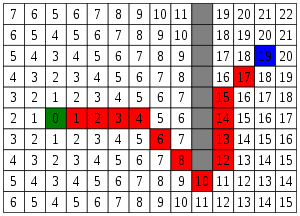

Awesome! Let’s say `node(0)` is our starting position and `node(19)` is our end position. Let’s also say that our current node is at the the red square `node(4)`.

*G is the distance between the current node and the start node.*

If we count back we can see that `node(4)` is 4 spaces away from our start node.

We can also say that G is 1 more than our parent node (`node(3)`). So in this case for `node(4)`, `currentNode.g = 4`.

*H is the heuristic — estimated distance from the current node to the end node.*

So let’s calculate the distance. If we take a look we’ll see that if we go over 7 spaces and up 3 spaces, we’ve reached our end node (node(19)).

Let’s apply the Pythagorean Theorem! `a² + b² = c²`. After we’ve applied this, we’ll see that `currentNode.h = 7² + 3²`. Or `currentNode.h = 58`.

But don’t we have to apply the square root to 58? Nope! We can skip that calculation on every node and still get the same output. Clever!

With a heuristic, we need to make sure that we can actually calculate it. It’s also very important that the heuristic is always an underestimation of the total path, as an overestimation will lead to A* searching for through nodes that may not be the ‘best’ in terms of f value.

*F is the total cost of the node.*

So let’s add up h and g to get the total cost of our node. `currentNode.f = currentNode.g + currentNode.h`. Or `currentNode.f = 4+ 58. Or currentNode.f = 62`.

Time to use f = g + h: Alright, so that was a lot of work. Now with all that work, what am I going to use this f value for?

With this new `f` value, we can look at all our nodes and say, “Hey, is this the best node I can pick to move forward with right now?”. Rather than running through every node, we can pick the ones that have the best chance of getting us to our goal.

In [31]:
from collections import deque
 
class Graph:
    def __init__(self, adjac_lis):
        self.adjac_lis = adjac_lis
 
    def get_neighbors(self, v):
        return self.adjac_lis[v]
 
    # This is heuristic function which is having equal values for all nodes
    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1
        }
 
        return H[n]
 
    def a_star_algorithm(self, start, stop):
        # In this open_lst is a lisy of nodes which have been visited, but who's 
        # neighbours haven't all been always inspected, It starts off with the start 
  #node
        # And closed_lst is a list of nodes which have been visited
        # and who's neighbors have been always inspected
        open_lst = set([start])
        closed_lst = set([])
 
        # poo has present distances from start to all other nodes
        # the default value is +infinity
        poo = {}
        poo[start] = 0
 
        # par contains an adjac mapping of all nodes
        par = {}
        par[start] = start
 
        while len(open_lst) > 0:
            n = None
 
            # it will find a node with the lowest value of f() -
            for v in open_lst:
                if n == None or poo[v] + self.h(v) < poo[n] + self.h(n):
                    n = v;
 
            if n == None:
                print('Path does not exist!')
                return None
 
            # if the current node is the stop
            # then we start again from start
            if n == stop:
                reconst_path = []
 
                while par[n] != n:
                    reconst_path.append(n)
                    n = par[n]
 
                reconst_path.append(start)
 
                reconst_path.reverse()
 
                print('Path found: {}'.format(reconst_path))
                return reconst_path
 
            # for all the neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
              # if the current node is not presentin both open_lst and closed_lst
                # add it to open_lst and note n as it's par
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    par[m] = n
                    poo[m] = poo[n] + weight
 
                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update par data and poo data
                # and if the node was in the closed_lst, move it to open_lst
                else:
                    if poo[m] > poo[n] + weight:
                        poo[m] = poo[n] + weight
                        par[m] = n
 
                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add(m)
 
            # remove n from the open_lst, and add it to closed_lst
            # because all of his neighbors were inspected
            open_lst.remove(n)
            closed_lst.add(n)
 
        print('Path does not exist!')
        return None

In [32]:
adjac_lis = {
    'A': [('B', 1), ('C', 3), ('D', 7)],
    'B': [('D', 5)],
    'C': [('D', 12)]
}
graph1 = Graph(adjac_lis)
graph1.a_star_algorithm('A', 'D')

Path found: ['A', 'B', 'D']


['A', 'B', 'D']

In this code, we have made the class named Graph, where multiple functions perform different operations. There is written with all the functions what all operations that function is performing. Then some conditional statements will perform the required operations to get the minimum path for traversal from one node to another node. Finally, we will get the output as the shortest path to travel from one node to another.

## Dijkstra's Algorithm

---

Given a graph and a source vertex in the graph, find the shortest paths from source to all vertices in the given graph.

Dijkstra’s algorithm is very similar to Prim’s algorithm for minimum spanning tree. Like Prim’s MST, we generate an SPT (shortest path tree) with a given source as root. We maintain two sets, one set contains vertices included in the shortest-path tree, another set includes vertices not yet included in the shortest-path tree. At every step of the algorithm, we find a vertex that is in the other set (set of not yet included) and has a minimum distance from the source.

Below are the detailed steps used in Dijkstra’s algorithm to find the shortest path from a single source vertex to all other vertices in the given graph. 

Algorithm 
1. Create a set sptSet (shortest path tree set) that keeps track of vertices included in shortest path tree, i.e., whose minimum distance from source is calculated and finalized. Initially, this set is empty. 
2. Assign a distance value to all vertices in the input graph. Initialize all distance values as INFINITE. Assign distance value as 0 for the source vertex so that it is picked first. 
3. While sptSet doesn’t include all vertices: 

- Pick a vertex u which is not there in sptSet and has minimum distance value.
- Include u to sptSet.
- Update distance value of all adjacent vertices of u. To update the distance values, iterate through all adjacent vertices. For every adjacent vertex v, if the sum of a distance value of u (from source) and weight of edge u-v, is less than the distance value of v, then update the distance value of v.

In [33]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \t Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = 1e7
 
        # Search not nearest vertex not in the
        # shortest path tree
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
 
        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]
 
        self.printSolution(dist)
 
# Driver program
g = Graph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
           ]
 
g.dijkstra(0)

Vertex 	 Distance from Source
0 		 0
1 		 4
2 		 12
3 		 19
4 		 21
5 		 11
6 		 9
7 		 8
8 		 14


# Performance Evaluation

---

Python is highly readable and efficient when compared to older programming languages like Java, Fortran, C, C++ etc. One key advantage of using Python for implementing search algorithms is that you don't have to worry about casting or explicit typing.

In Python, most of the search algorithms we discussed will work just as well if we're searching for a String. Keep in mind that we do have to make changes to the code for algorithms which use the search element for numeric calculations, like the interpolation search algorithm.

Python is also a good place to start if you want to compare the performance of different search algorithms for your dataset; building a prototype in Python is easier and faster because you can do more with fewer lines of code.

To compare the performance of our implemented search algorithms against a dataset, we can use the time library in Python:

In [ ]:
import time

start = time.time()
# call function here
end = time.time()
print(start-end)

## Comparison

---

From algorithm to algorithm

# Sources

---

- Linear Search, Binary Search, Jump Search, Fibonacci Search, Exponential Search, Interpolation Search
  - https://stackabuse.com/search-algorithms-in-python/
- A* Search
  - https://www.pythonpool.com/a-star-algorithm-python/
  - https://www.redblobgames.com/pathfinding/a-star/implementation.html
- Dijkstra's Algorithm
  - https://www.geeksforgeeks.org/python-program-for-dijkstras-shortest-path-algorithm-greedy-algo-7/